In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

import matplotlib.pyplot as plt

In [2]:

# Resposta enviada

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Replace NaN with 0
train.replace(np.nan, 0, regex=True,inplace=True)
test.replace(np.nan, 0, regex=True,inplace=True)


y_train = train['IN_TREINEIRO']
X_train = train[['NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU']]

X_test = test[['NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU']]

# Create logistic regression object
log_regr = linear_model.LogisticRegression()

# Train the model using the training sets
log_regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = log_regr.predict(X_test)

test['IN_TREINEIRO'] = y_pred
    
test.to_csv("answer.csv", mode='w', columns=['NU_INSCRICAO','IN_TREINEIRO'], index = False)

# Analisando o problema

In [3]:

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:

# Selecionando as variáveis relacionadas ao ano do ensimo médio que o aluno está cursando
df = df_train[['IN_TREINEIRO','NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU']]


In [5]:

# Verificando NaN
df[df.isna()==True].count()

IN_TREINEIRO       0
NU_IDADE           0
TP_ST_CONCLUSAO    0
TP_ANO_CONCLUIU    0
dtype: int64

In [6]:
df.dtypes

IN_TREINEIRO       int64
NU_IDADE           int64
TP_ST_CONCLUSAO    int64
TP_ANO_CONCLUIU    int64
dtype: object

In [7]:
plt.rcParams['figure.figsize'] =[6,6]

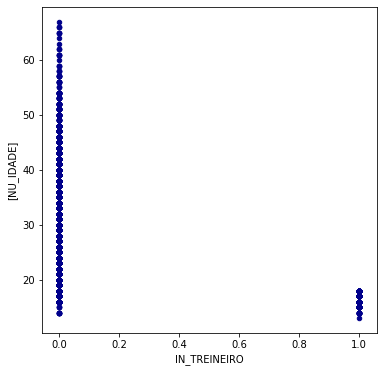

In [8]:
df.plot(x = 'IN_TREINEIRO', y =['NU_IDADE'], kind = 'scatter', c='DarkBlue')
plt.show()

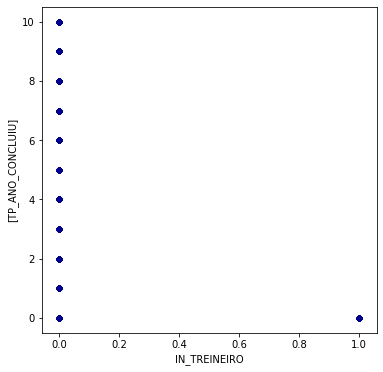

In [9]:
df.plot(x='IN_TREINEIRO',y=['TP_ANO_CONCLUIU'],kind = 'scatter',c='DarkBlue')
plt.show()

In [10]:

# Total de treineiros
print('Treineiros:', df['IN_TREINEIRO'][df['IN_TREINEIRO']==1].count())
#Treineiros parecem ter menos de 20 anos
print('Treineiros abaixo de 20 anos:', df['IN_TREINEIRO'][(df['IN_TREINEIRO']==1) & (df['NU_IDADE']<20)].count())
#Treineiros só concluirão o ensino médio depois de 2016, TP_ANO_CONCLUIU = 0 e TP_ST_CONCLUSAO = 3
print('Treineiros que concluirão o ensino médio depois de 2016:', df['IN_TREINEIRO'][(df['IN_TREINEIRO']==1) & (df['TP_ANO_CONCLUIU']==0) & (df['TP_ST_CONCLUSAO']==3)].count())

Treineiros: 1783
Treineiros abaixo de 20 anos: 1783
Treineiros que concluirão o ensino médio depois de 2016: 1783


In [11]:
df = df_train[['IN_TREINEIRO','NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU']]
df = df.assign(NU_IDADE_treineiro = lambda df: df['NU_IDADE'] <20)

In [12]:
df

,IN_TREINEIRO,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,NU_IDADE_treineiro
0,0,24,1,4,False
1,0,17,2,0,True
2,0,21,3,0,False
3,0,25,1,9,False
4,0,28,1,4,False
...,...,...,...,...,...
13725,0,20,1,3,False
13726,0,33,1,10,False
13727,1,15,3,0,True
13728,0,36,4,0,False


In [13]:
df = df.assign(TP_ANO_CONCLUIU_treineiro = lambda df: df['TP_ANO_CONCLUIU'] ==0)
df

,IN_TREINEIRO,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,NU_IDADE_treineiro,TP_ANO_CONCLUIU_treineiro
0,0,24,1,4,False,False
1,0,17,2,0,True,True
2,0,21,3,0,False,True
3,0,25,1,9,False,False
4,0,28,1,4,False,False
...,...,...,...,...,...,...
13725,0,20,1,3,False,False
13726,0,33,1,10,False,False
13727,1,15,3,0,True,True
13728,0,36,4,0,False,True


In [14]:
df = df.assign(TP_ST_CONCLUSAO_treineiro = lambda df: df['TP_ST_CONCLUSAO'] ==3)
df


,IN_TREINEIRO,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,NU_IDADE_treineiro,TP_ANO_CONCLUIU_treineiro,TP_ST_CONCLUSAO_treineiro
0,0,24,1,4,False,False,False
1,0,17,2,0,True,True,False
2,0,21,3,0,False,True,True
3,0,25,1,9,False,False,False
4,0,28,1,4,False,False,False
...,...,...,...,...,...,...,...
13725,0,20,1,3,False,False,False
13726,0,33,1,10,False,False,False
13727,1,15,3,0,True,True,True
13728,0,36,4,0,False,True,False


In [15]:
y = df['IN_TREINEIRO']
cases = [['NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU'],
        ['NU_IDADE','TP_ST_CONCLUSAO'], # esse
        ['NU_IDADE','TP_ANO_CONCLUIU'],#not
        ['TP_ST_CONCLUSAO','TP_ANO_CONCLUIU']] # not
# X = df[['NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU']]
X = df[['NU_IDADE_treineiro','TP_ST_CONCLUSAO_treineiro','TP_ANO_CONCLUIU_treineiro']]


In [16]:
X_test

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU
0,19,1,3
1,24,1,4
2,16,3,0
3,17,2,0
4,19,1,1
...,...,...,...
4565,17,2,0
4566,20,1,2
4567,22,1,5
4568,19,2,0


Coefficients: 
 [[5.44102665 8.04749911 1.09226431]]
Mean squared error: 0.04
Coefficient of determination: 0.71


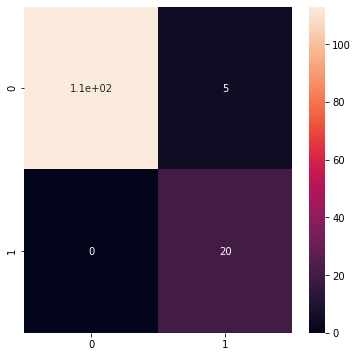

In [17]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Create linear regression object
logi_regr = linear_model.LogisticRegression()

# Train the model using the training sets
logi_regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = logi_regr.predict(X_test)

# The coefficients
print('Coefficients: \n', logi_regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# The confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)